<a href="https://colab.research.google.com/github/Pandey-A/ml-labs/blob/main/Lab_5_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Logistic Regression Evaluation Metrics - Interactive Notebook

This notebook provides a hands-on and visual understanding of **logistic regression evaluation metrics**, following a Coursera DeepLearning.ai style.

We will cover:
- Accuracy
- Precision
- Recall
- F1-score
- ROC Curve and AUC

---

In [1]:
# 📦 Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 📊 Load and Prepare the Dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use only two features for visualization
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

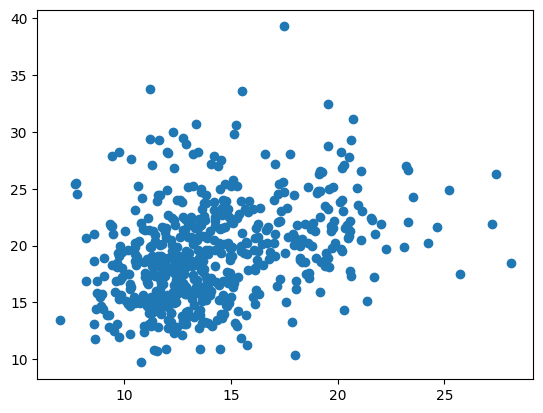

In [3]:
plt.scatter(X[:,0],X[:,1])

## 📚 Evaluation Metrics Overview

**Accuracy**: How often is the classifier correct?

**Precision**: When it predicts positive, how often is it correct?

**Recall**: When it's actually positive, how often does it predict correctly?

**F1 Score**: Harmonic mean of precision and recall.

**ROC Curve**: Shows performance across all classification thresholds.


In [4]:
# 🎛️ Interactive Threshold Slider
def evaluate_threshold(threshold=0.4):
    y_pred = (probs >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
    axs[0].set_title('Confusion Matrix')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    metrics = [acc, prec, rec, f1]
    print('\n -----------------------------------------------------------------------------------')
    print(f'\n Accuracy = {acc}, Precision ={prec}, Recall = {rec}, F1 Score = {f1}')
    print('\n -----------------------------------------------------------------------------------')
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    axs[1].bar(labels, metrics, color='orange')
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f'Metrics at Threshold = {threshold:.2f}')

    plt.tight_layout()
    plt.show()

interact(evaluate_threshold, threshold=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.001));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.001), Output()), _dom_cl…

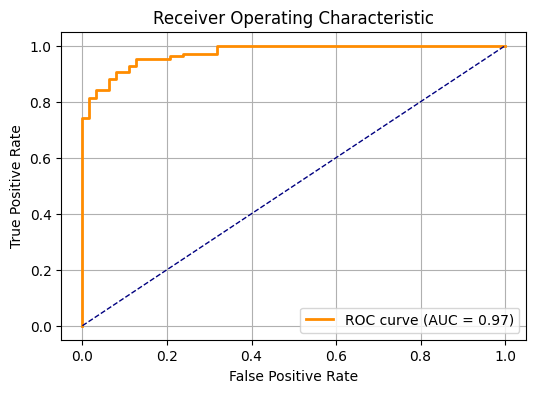

In [5]:
# 📈 ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [6]:
thresholds

array([           inf, 9.99829834e-01, 8.56818452e-01, 8.54503397e-01,
       7.96231778e-01, 7.93199666e-01, 7.72434907e-01, 7.51913513e-01,
       7.35687273e-01, 7.24746442e-01, 6.79356730e-01, 6.39845023e-01,
       5.98692835e-01, 5.92479760e-01, 5.62299154e-01, 4.61403663e-01,
       4.51130544e-01, 3.55717181e-01, 3.09703643e-01, 2.30946966e-01,
       2.19972967e-01, 1.78886074e-05])

## 🧠 Conclusion

- Logistic regression gives probabilities; thresholding turns them into class predictions.
- Different thresholds impact accuracy, precision, recall, and F1.
- Choose the threshold based on problem context: spam filtering, medical diagnosis, etc.
- ROC Curve provides a threshold-independent view of model quality.

---
🎯 **Next Steps**: Try this notebook with different models or imbalanced datasets to see how metrics behave!

## ⚖️ Extension: Imbalanced Dataset Handling

Class imbalance is a common issue in classification problems like fraud detection or medical diagnostics.

We will now generate a synthetic imbalanced dataset to observe how metrics like Precision and Recall behave.

In [7]:
from sklearn.datasets import make_classification

# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1,
                                   weights=[0.9, 0.1], random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)
model_imb = LogisticRegression()
model_imb.fit(X_train_imb, y_train_imb)
probs_imb = model_imb.predict_proba(X_test_imb)[:, 1]

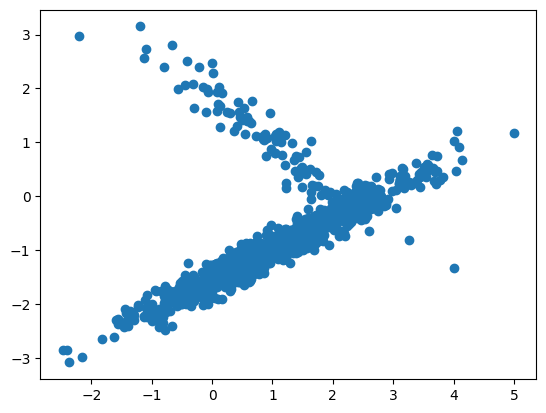

In [8]:
plt.scatter(X_imb[:,0], X_imb[:,1])

In [9]:
# Interactive metrics for imbalanced data
def evaluate_imbalance(threshold=0.5):
    y_pred = (probs_imb >= threshold).astype(int)
    acc = accuracy_score(y_test_imb, y_pred)
    prec = precision_score(y_test_imb, y_pred)
    rec = recall_score(y_test_imb, y_pred)
    f1 = f1_score(y_test_imb, y_pred)
    cm = confusion_matrix(y_test_imb, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axs[0])
    axs[0].set_title('Confusion Matrix (Imbalanced)')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    metrics = [acc, prec, rec, f1]
    print('\n -----------------------------------------------------------------------------------')
    print(f'\n Accuracy = {acc}, Precision ={prec}, Recall = {rec}, F1 Score = {f1}')
    print('\n -----------------------------------------------------------------------------------')
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    axs[1].bar(labels, metrics, color='purple')
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f'Metrics at Threshold = {threshold:.2f}')

    plt.tight_layout()
    plt.show()

interact(evaluate_imbalance, threshold=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.001));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.001), Output()), _dom_cl…

## 📉 Precision-Recall Curve

The Precision-Recall (PR) curve is useful when dealing with imbalanced datasets.
It plots **Precision** vs **Recall** for different thresholds.

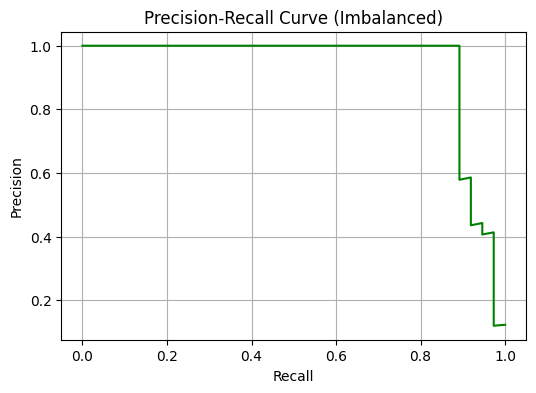

In [10]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_imb, probs_imb)

plt.figure(figsize=(6, 4))
plt.plot(recalls, precisions, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Imbalanced)')
plt.grid(True)
plt.show()

# ROC Curve and Effect of Threshold on Classification

In binary classification, a model outputs **scores** (probabilities or confidence values).  
To convert these scores into class predictions, we apply a **threshold** (commonly 0.5).  

- If `score ≥ threshold`, predict **positive (1)**  
- If `score < threshold`, predict **negative (0)**  

Changing the threshold affects the **True Positive Rate (TPR)** and **False Positive Rate (FPR)**:

- **TPR (Recall / Sensitivity):**  
  $
  \text{TPR} = \frac{TP}{TP + FN}
  $

- **FPR:**  
  $
  \text{FPR} = \frac{FP}{FP + TN}
  $

The **ROC curve** plots TPR vs. FPR across all possible thresholds.  
The **AUC (Area Under Curve)** summarizes the overall discriminative ability of the model:
- AUC = 1 → Perfect classifier  
- AUC = 0.5 → Random guessing  

### What this code does:
1. Generates synthetic data:
   - Positives have scores clustered around **0.7**  
   - Negatives have scores clustered around **0.3**  
   - This ensures overlapping but separable distributions.  
2. Computes the ROC curve and AUC.  
3. Provides an **interactive slider** to select threshold values:  
   - Shows how confusion matrix elements (TP, FP, FN, TN) change.  
   - Plots the ROC curve and highlights the chosen threshold as a red dot.  


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from sklearn.metrics import roc_curve, auc

# Generate synthetic ground truth
np.random.seed(42)
y_true = np.random.randint(0, 2, size=200)  # 0 = negative, 1 = positive

# Generate scores: positives ~0.7, negatives ~0.3
y_scores = np.where(
    y_true == 1,
    np.random.normal(loc=0.7, scale=0.15, size=200),   # positives cluster high
    np.random.normal(loc=0.3, scale=0.15, size=200)    # negatives cluster low
)
y_scores = np.clip(y_scores, 0, 1)  # keep scores in [0,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

def plot_threshold_effect(threshold=0.5):
    # Predictions based on the selected threshold
    y_pred = (y_scores >= threshold).astype(int)

    # Compute confusion matrix elements
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))

    curr_tpr = TP / (TP + FN) if (TP+FN) > 0 else 0
    curr_fpr = FP / (FP + TN) if (FP+TN) > 0 else 0

    # Plot ROC curve
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.scatter([curr_fpr], [curr_tpr], c='red', s=80, label=f"Threshold = {threshold:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.8)
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve and Effect of Classification Threshold')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print(f"Threshold = {threshold:.2f} → TP={TP}, FP={FP}, FN={FN}, TN={TN}, "
          f"TPR={curr_tpr:.3f}, FPR={curr_fpr:.3f}")

# Interactive slider
interact(
    plot_threshold_effect,
    threshold=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, continuous_update=False)
);


interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='threshold', max=1.0, step=0…